## 3.5.1 Quantization

Quantization refers to the number of grayscales used to represent the image. Most
images will have 256 grayscales, which is more than enough for the needs of human vision. However,
there are circumstances in which it may be more practical to represent the image with fewer grayscales.

In general we can say, quantization means mapping the grayscale vlues. For example:

<table>
    <tr><td>0 - 63</td><td>0</td></tr>
    <tr><td>64 - 127</td><td>1</td></tr>
    <tr><td>128 - 191</td><td>2</td></tr>
    <tr><td>192 - 255</td><td>3</td></tr>
</table>

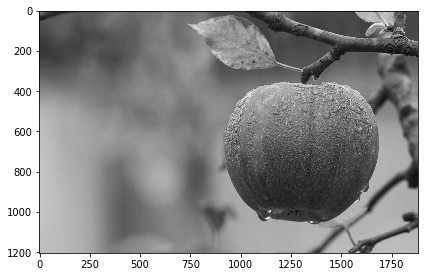

In [46]:
import skimage.io as io

img = io.imread('_images/apple.jpeg')
io.imshow(img)

In [47]:
import numpy as np

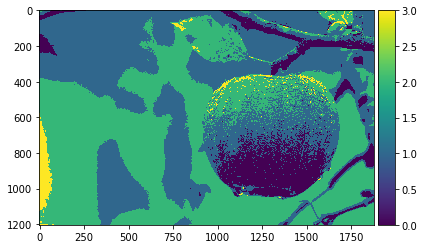

In [48]:
img1 = img // 64
io.imshow(img1)

### The image quantized to 2 grayscales

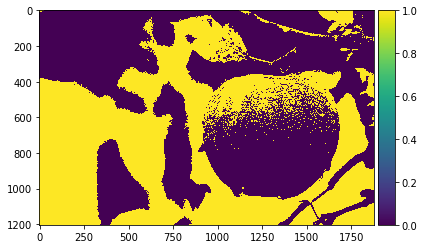

In [49]:
img1 = img // 128
io.imshow(img1)

In [50]:
img1.dtype

dtype('uint8')

## 3.5.2 Dithering
---
Dithering, in general terms, refers to the process of reducing the number of colors in an image.

One method of dealing with such false contours involves adding random values to the image before
quantization. Equivalently, for quantization to 2 grayscales, we may compare the image to a random
matrix $r$. The trick is to devise a suitable matrix so that grayscales are represented evenly in the result. For
example, an area containing mid-way gray level (around 127) would have a checkerboard pattern; a darker
area will have a pattern containing more black than white, and a light area will have a pattern containing
more white than black. One standard matrix is,

In [85]:
D = np.array([[0, 128], [192, 64]])
D

array([[  0, 128],
       [192,  64]])

Output pixel $p(i, j)$ is $1$ if $x(i, j) > d(i, j)$

In [86]:
r = np.tile(D, (4, 5))
r.shape, r

((8, 10), array([[  0, 128,   0, 128,   0, 128,   0, 128,   0, 128],
        [192,  64, 192,  64, 192,  64, 192,  64, 192,  64],
        [  0, 128,   0, 128,   0, 128,   0, 128,   0, 128],
        [192,  64, 192,  64, 192,  64, 192,  64, 192,  64],
        [  0, 128,   0, 128,   0, 128,   0, 128,   0, 128],
        [192,  64, 192,  64, 192,  64, 192,  64, 192,  64],
        [  0, 128,   0, 128,   0, 128,   0, 128,   0, 128],
        [192,  64, 192,  64, 192,  64, 192,  64, 192,  64]]))

In [87]:
r, c = img.shape
r, c

(1204, 1880)

In [89]:
p = int(r / 2)
q = int(c / 2)
r = np.tile(D, (p, q))

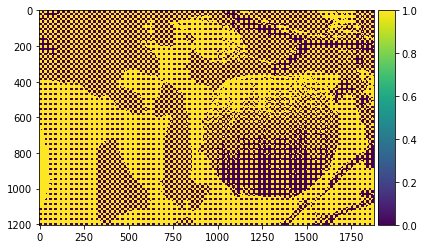

In [90]:
img1 = (img > r).astype(np.uint8)
io.imshow(img1)